In [3]:
import pandas as pd
import numpy as np

# Numero delle simulazioni
n = 10000

Vbm = 0
Vbd = 0
Vrb = 0

Pbm = np.zeros(n)
Pbd = np.zeros(n)
Prb = np.zeros(n)

for j in range(n):
    Squadre = ['Bayern','Dortmund','RBL']
    P = [73,66,62]

    col = ['Squadre','P']
    C = pd.DataFrame(columns=col)

    C['P'] = P
    C['Squadre'] = Squadre
    
    Garebm = [8,7,6]
    Garebd = [8,-1,7]
    Garerb = [8,-1,8]

    Risbm = np.random.rand(len(Garebm))*10
    Risbd = np.random.rand(len(Garebd))*10
    Risrb = np.random.rand(len(Garerb))*10
    

    for i in range(len(Garebm)):
        
        #Bayern
        if Risbm[i] == -1:
            pass
        elif Risbm[i] < Garebm[i]:
            P[0] += 3
        elif Risbm[i] < (Garebm[i] + 0.5*(10-Garebm[i])):
            P[0] += 1

        #Dortmund
        if Risbd[i] == -1:
            pass
        elif Risbd[i] < Garebd[i]:
            P[1] += 3
        elif Risbd[i] < (Garebd[i] + 0.5*(10-Garebd[i])):
            P[1] += 1

        #RBL
        if Risrb[i] == -1:
            pass
        elif Risrb[i] < Garerb[i]:
            P[2] += 3
        elif Risrb[i] < (Garerb[i] + 0.5*(10-Garerb[i])):
            P[2] += 1
            

    # RBL-Dortmund 4-3-3
    Risrd = np.random.rand()*10
    if Risrd < 4:
        P[2] += 3
        
    elif Risrd < 7:
        P[2] += 1
        P[1] += 1
    else:
        P[1] += 3


    # Aggiornare la classifica
    Cf = pd.DataFrame(columns=col)
    Cf['P'] = P
    Cf['Squadre'] = Squadre
    Cf = Cf.sort_values(by='P',ascending=False)
    Cf = Cf.reset_index(drop=True)
    
    if Cf['P'][0] == Cf['P'][1]:
        
        if 'Bayern' in (Cf['Squadre'][0],Cf['Squadre'][1]):
            # Parità Bayern-Dortmund
            if 'Dortmund' in (Cf['Squadre'][0],Cf['Squadre'][1]):
                Vbm += 1
                
            # Parità Bayern RBL
            if 'RBL' in (Cf['Squadre'][0],Cf['Squadre'][1]):
                Vbm += 1
                
        else:
            # Parità Dortmund-RBL
                if Risrd < 5.5:
                    Vrb += 1
                else:
                    Vbd += 1
    
    elif Cf['Squadre'][0] == 'Bayern':
        Vbm += 1
    elif Cf['Squadre'][0] == 'Dortmund':
        Vbd += 1
    elif Cf['Squadre'][0] == 'RBL':
        Vrb += 1


    Pbm[j] = P[0]
    Pbd[j] = P[1]
    Prb[j] = P[2]
  
print('Vittoria Bayern\n',Vbm*100/n)
print('Vittoria Dortmund\n',Vbd*100/n)
print('Vittoria RBL\n',Vrb*100/n)

Vittoria Bayern
 99.79
Vittoria Dortmund
 0.21
Vittoria RBL
 0.0


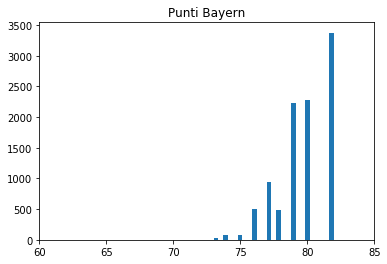

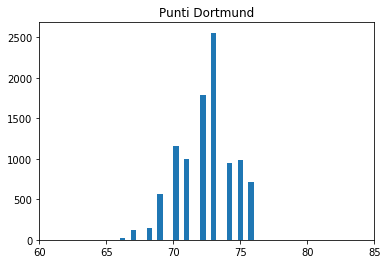

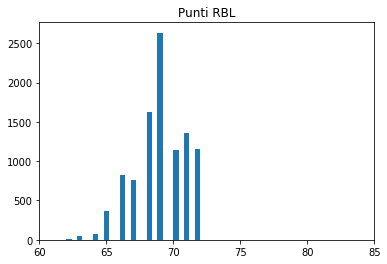

In [4]:
import matplotlib.pyplot as plt

# Istogrammi punti

plt.figure(1)
plt.title('Punti Bayern')
plt.hist(Pbm,25)
plt.xlim(60,85)
plt.show()

plt.figure(2)
plt.title('Punti Dortmund')
plt.hist(Pbd,25)
plt.xlim(60,85)
plt.show()

plt.figure(3)
plt.title('Punti RBL')
plt.hist(Prb,25)
plt.xlim(60,85)
plt.show()

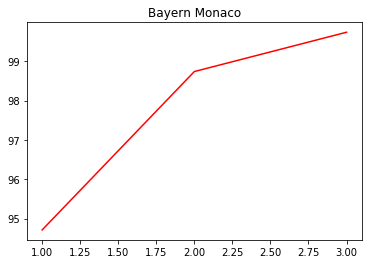

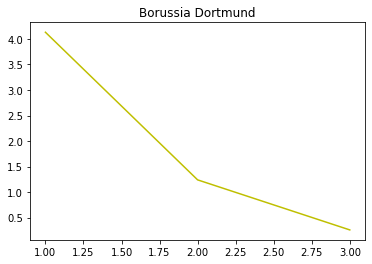

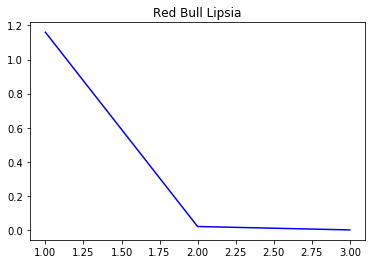

In [25]:
# Grafici andamenti percentuali

bay = [94.71,98.74,99.74]
bor = [4.13,1.24,0.26]
lip = [1.16,0.02,0]
g = [1,2,3]

plt.figure(1)
plt.title('Bayern Monaco')
plt.plot(g,bay,c='r')
plt.show()

plt.figure(1)
plt.title('Borussia Dortmund')
plt.plot(g,bor,c='y')
plt.show()

plt.figure(1)
plt.title('Red Bull Lipsia')
plt.plot(g,lip,c='b')
plt.show()